In [1]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import json
import networkx as nx

In [16]:
# Funkcja do pobrania i przetworzenia treści z URL (pojedyncze)
def get_page_content(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        paragraphs = soup.find_all('p')
        text = ' '.join([p.get_text() for p in paragraphs])
        return text
    return ""

In [11]:
# Funkcja do przetwarzania tekstu: usuwanie liczb i znaków specjalnych
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Usunięcie liczb
    text = re.sub(r'[^a-zA-ZąćęłńóśźżĄĆĘŁŃÓŚŹŻ\s]', ' ', text)  # Usunięcie znaków specjalnych
    return text.lower().split()

In [12]:
# Pobranie 100 artykułów w wybranym języku przy uzyciu The Wikimedia API
language_code = 'pl'
search_query = 'the'  
number_of_results = 100
headers = {
    'User-Agent': 'YOUR_APP_NAME (YOUR_EMAIL_OR_CONTACT_PAGE)' 
}

base_url = 'https://api.wikimedia.org/core/v1/wikipedia/'
endpoint = '/search/page'
url = base_url + language_code + endpoint

parameters = {'q': search_query, 'limit': number_of_results}

response = requests.get(url, headers=headers, params=parameters)

response = json.loads(response.text)

urls=[]
for page in response['pages']:
    article_url = 'https://' + language_code + '.wikipedia.org/wiki/' + page['key']
    urls.append(article_url)

print(urls)

['https://pl.wikipedia.org/wiki/The_Cure', 'https://pl.wikipedia.org/wiki/Władca_Pierścieni:_Pierścienie_Władzy', 'https://pl.wikipedia.org/wiki/The_Voice_of_Poland', 'https://pl.wikipedia.org/wiki/The_Jackson_5', 'https://pl.wikipedia.org/wiki/André_the_Giant', 'https://pl.wikipedia.org/wiki/The_Mamas_&_the_Papas', 'https://pl.wikipedia.org/wiki/Bob_Marley', 'https://pl.wikipedia.org/wiki/Eminem', 'https://pl.wikipedia.org/wiki/The_Voice_Kids_(Polska)', 'https://pl.wikipedia.org/wiki/Order_Imperium_Brytyjskiego', 'https://pl.wikipedia.org/wiki/Skrzypek_na_dachu', 'https://pl.wikipedia.org/wiki/The_Final_Countdown_(singel)', 'https://pl.wikipedia.org/wiki/In_the_End', 'https://pl.wikipedia.org/wiki/Tupac_Shakur', 'https://pl.wikipedia.org/wiki/The_Doors', 'https://pl.wikipedia.org/wiki/We_Are_the_World', 'https://pl.wikipedia.org/wiki/The_The', 'https://pl.wikipedia.org/wiki/The_World', 'https://pl.wikipedia.org/wiki/Moda_na_sukces', 'https://pl.wikipedia.org/wiki/The_Monarch_of_the_Gl

In [13]:
#POJEDYNCZY ARTYKUL

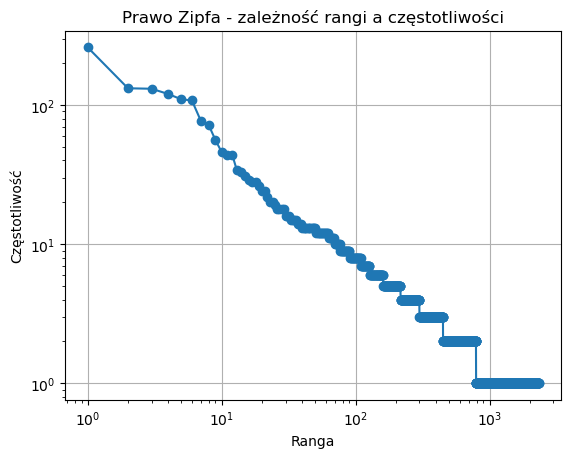

['w', 'i', 'na', 'z', 'się', 'the', 'do', 'zespół', 'zespołu', 'cure', 'roku', 'o', 'nie', 'a', 'przez', 'to', 'po', 'smith', 'grupy', 'od', 'jak', 'album', 'jednak', 'jest', 'jego', 'tego', 'został', 'lat', 'również', 'że', 'jako', 'oraz', 'za', 'także', 'podczas', 'jednocześnie', 'miejsce', 'pod', 'który', 'grupa', 'utwory', 'płyta', 'smitha', 'był', 'wówczas', 'albumu', 'disintegration', 'iż', 'utworów', 'tym', 'później', 'było', 'działalności', 'on', 'trasy', 'rock', 'dwa', 'płyty', 'bardzo', 'już', 'czy', 'ich', 'bloodflowers', 'była', 'ze', 'gitara', 'tej', 'tour', 'robert', 'tolhurst', 'thompson', 'kilka', 'albumem', 'co', 'festiwalu', 'muzyki', 'też', 'dnia', 'koncertów', 'miał', 'teksty', 'faith', 'płytę', 'najbardziej', 'koncerty', 'tylko', 'były', 'trasę', 'koncert', 'wish', 'wydawnictwa', 'czasie', 'dla', 'pol', 'singiel', 'często', 'pierwszy', 'nad', 'sam', 'działalność', 'płyt', 'zaś', 'wszystkich', 'tak', 'kilku', 'której', 'latach', 'miała', 'pornography', 'byli', 'któr

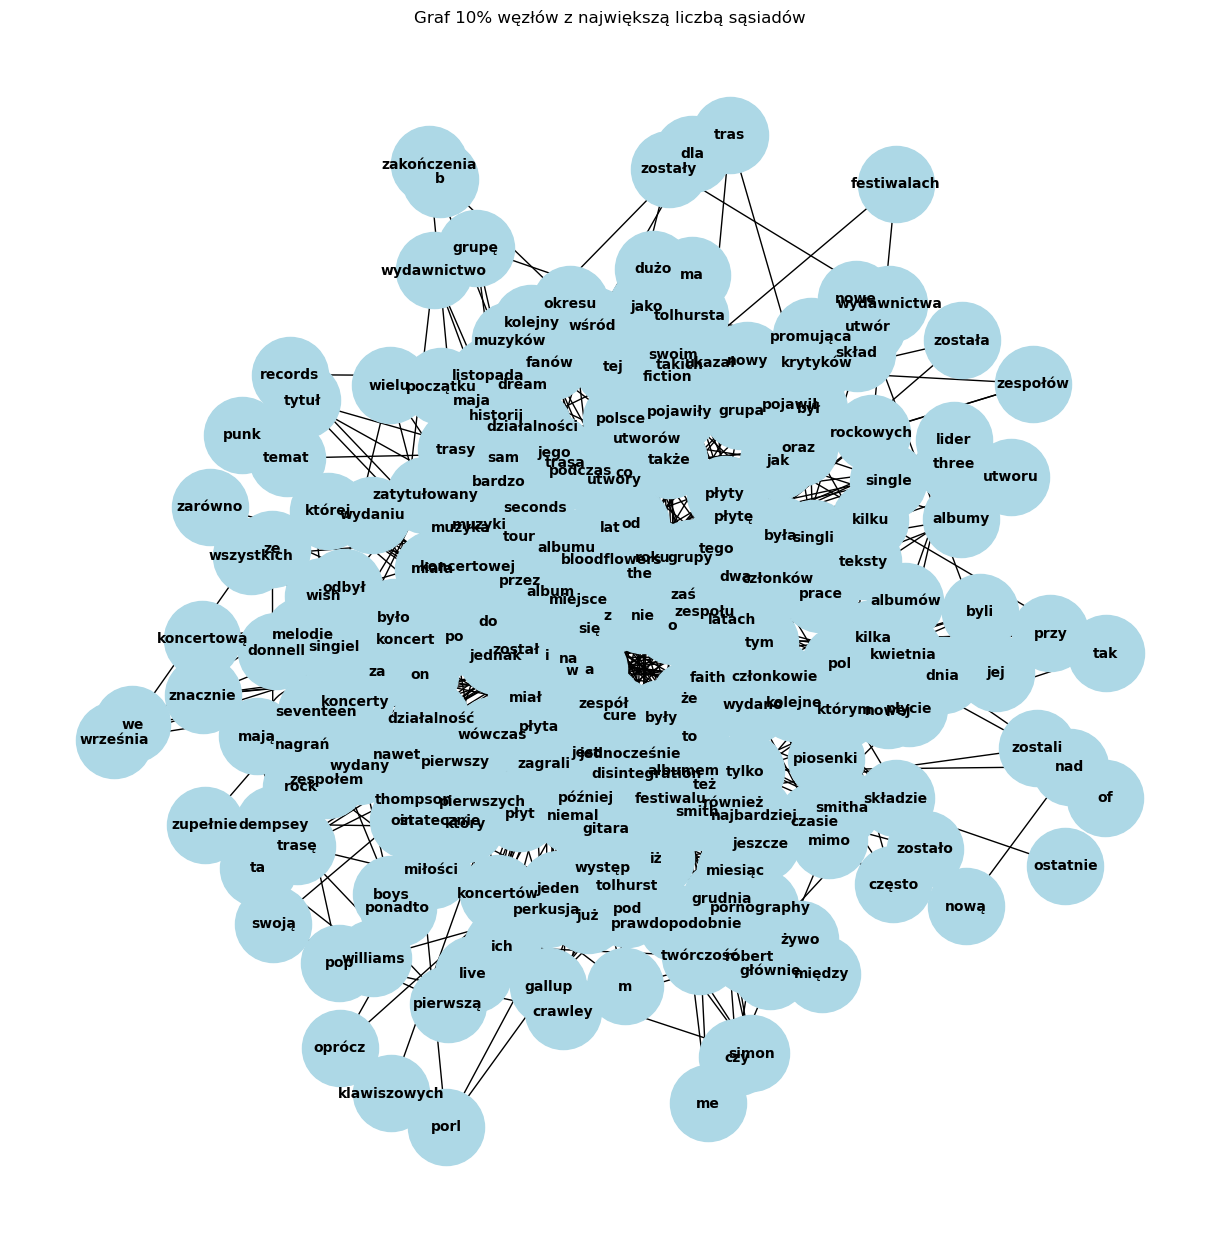

In [27]:
# URL artykułu
url = urls[0]

# Pobranie tekstu
text = get_page_content(url)

if text:  # Jeśli tekst został pobrany
    words = preprocess_text(text)

# Zliczenie częstotliwości wyrazów
word_count = Counter(words)

# Sortowanie słów według częstotliwości
sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

# Rangi i częstotliwości do prawa Zipfa
ranks = np.arange(1, len(sorted_words) + 1)
freq = np.array([count for _, count in sorted_words])

# Wykres log-log (prawo Zipfa)
plt.loglog(ranks, freq, marker="o")
plt.title("Prawo Zipfa - zależność rangi a częstotliwości")
plt.xlabel("Ranga")
plt.ylabel("Częstotliwość")
plt.grid(True)
plt.show()

G = nx.Graph()
G.add_nodes_from(words)

# Dodanie krawędzi między słowami występującymi obok siebie
for i in range(len(words) - 1):
    word1 = words[i]
    word2 = words[i + 1]
    G.add_edge(word1, word2)

# Wyodrębnienie 10% wierzchołków o największej liczbie sąsiadów
num_nodes_to_extract = int(0.1 * len(G.nodes())) 
sorted_nodes_by_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)

top_nodes = [node for node, degree in sorted_nodes_by_degree[:num_nodes_to_extract]]

print(top_nodes)

H = G.subgraph(top_nodes)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(H, k=0.5)
nx.draw(H, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold")
plt.title("Graf 10% węzłów z największą liczbą sąsiadów")
plt.show()


In [6]:
#100 artykułów

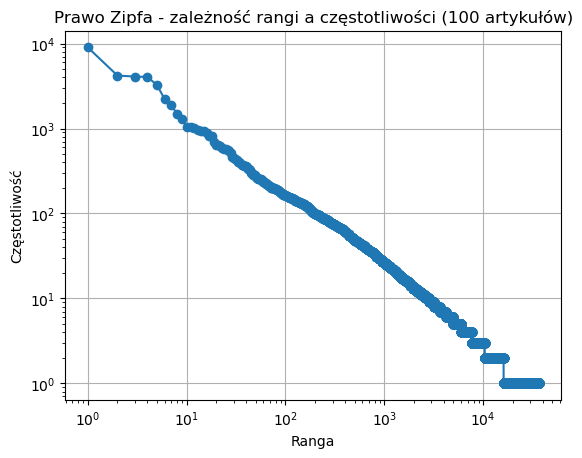

['w', 'i', 'z', 'na', 'się', 'do', 'oraz', 'a', 'the', 'przez', 'nie', 'o', 'po', 'jest', 'że', 'to', 'od', 'jego', 'jako', 'który', 'był', 'roku', 'za', 'jak', 'został', 'dla', 'zespół', 'również', 'zespołu', 'grupy', 'także', 'czy', 'podczas', 'co', 'go', 'ze', 'album', 'które', 'jednak', 'ich', 'of', 'pod', 'była', 'in', 'było', 'miał', 'która', 'później', 'też', 'ale', 'są', 'rock', 'lat', 'm', 'mu', 'jej', 'została', 'tym', 'inne', 'tego', 'iron', 'utwór', 'on', 'maiden', 'hendrix', 'gdzie', 'przed', 'ponad', 'albumu', 'lub', 's', 'płyty', 'były', 'już', 'gry', 'aby', 'koncertów', 'pierwszy', 'grupa', 'tylko', 'zaś', 'we', 'której', 'którego', 'by', 'przy', 'undertaker', 'ten', 'gdy', 'tak', 'ego', 'formacji', 'kiedy', 'jacksona', 'queen', 'film', 'kilka', 'wcześniej', 'muzycy', 'wielu', 'trasy', 'języki', 'muzyki', 'listopada', 'według', 'września', 'serialu', 'którzy', 'marca', 'którym', 'wiele', 'utwory', 'r', 'maja', 'bardzo', 'ma', 'jackson', 'czerwca', 'często', 'nad', 'nato

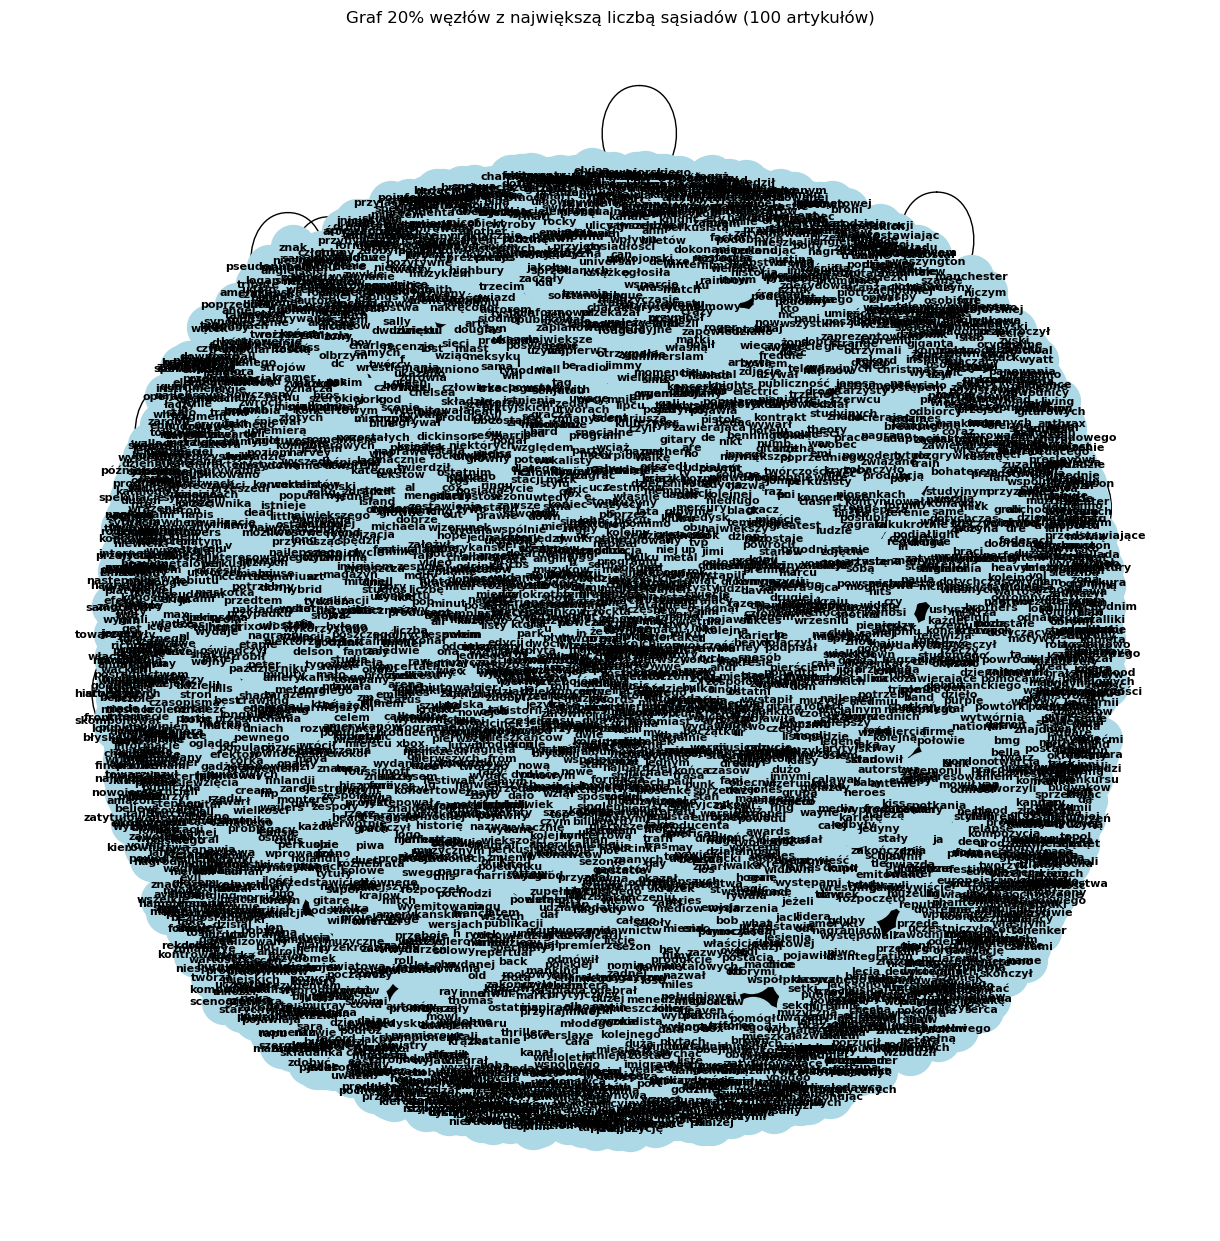

In [21]:
all_words = []  # Lista na słowa ze wszystkich artykułów

# Przetwarzanie każdego artykułu
for url in urls:
    text = get_page_content(url)
    if text:  # Jeśli tekst został pobrany
        words = preprocess_text(text)
        all_words.extend(words)  # Dodajemy słowa do ogólnej listy

# Zliczenie częstotliwości słów dla wszystkich artykułów
word_count = Counter(all_words)

# Sortowanie słów według częstotliwości
sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

# Prawo Zipfa - przygotowanie danych
ranks = np.arange(1, len(sorted_words) + 1)
freq = np.array([count for _, count in sorted_words])

# Wykres log-log (prawo Zipfa)
plt.loglog(ranks, freq, marker="o")
plt.title("Prawo Zipfa - zależność rangi a częstotliwości (100 artykułów)")
plt.xlabel("Ranga")
plt.ylabel("Częstotliwość")
plt.grid(True)
plt.show()

# Tworzenie grafu
G = nx.Graph()
G.add_nodes_from(all_words)

# Dodanie krawędzi między słowami występującymi obok siebie w każdym artykule
for url in urls:
    text = get_page_content(url)
    if text:
        words = preprocess_text(text)
        for i in range(len(words) - 1):
            word1 = words[i]
            word2 = words[i + 1]
            G.add_edge(word1, word2)


# Wyodrębnienie 10% wierzchołków o największej liczbie sąsiadów
num_nodes_to_extract = int(0.1 * len(G.nodes()))  # 10% całkowitej liczby węzłów
sorted_nodes_by_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)  # Sortowanie węzłów według stopnia

top_nodes = [node for node, degree in sorted_nodes_by_degree[:num_nodes_to_extract]]

print(top_nodes)

# Tworzenie podgrafu
H = G.subgraph(top_nodes)

# Wizualizacja grafu
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(H, k=0.5)
nx.draw(H, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=8, font_weight="bold")
plt.title("Graf 10% węzłów z największą liczbą sąsiadów (100 artykułów)")
plt.show()
